# Universal Quantum Algorithms For MaxCut And Ising
This Notebook presents a performance demo of the algorithm presented in the paper <br/>
**Universal Quantum Algorithms For The Weighted Maximum Cut Problem And The Ising Model**.


Given an input graph the `MaxCut` class instance computes an outputs an approximate solution for the graph partitioning problem.


# Install
The code depends on the Python packages [numpy](https://numpy.org/install/), [networkx](https://networkx.org/documentation/stable/install.html), [qiskit](https://qiskit.org/documentation/stable/0.24/install.html) and [dwave](https://docs.ocean.dwavesys.com/projects/system/en/latest/installation.html).

- Please download the repository and install the requirements in `requirements.txt` or refer to the product pages for reference.

- Once you satisfied the dependency, run `pip install .` inside the directory.

You can now run the notebook!


## Import the `MaxCut` class

In [11]:
%matplotlib inline

In [12]:
from src.max_cut import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

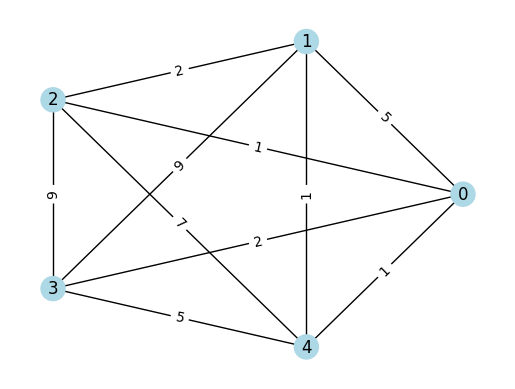

In [13]:
n = 5         # Graph size
p = (1., 0.)  # probability by wich (quadratic, unary) edges are generated.
entanglement = {1: None,
                2: 'bell',
                3: 'full',
                4: 'linear',
                5: 'circular'}   # Eventually add entanglement after the Ansatz
mc = MaxCut(n=n, p=p, entanglement=entanglement[1], brute_force=False, exact_costs=False)
mc.draw_graph()

## Plot the circuit

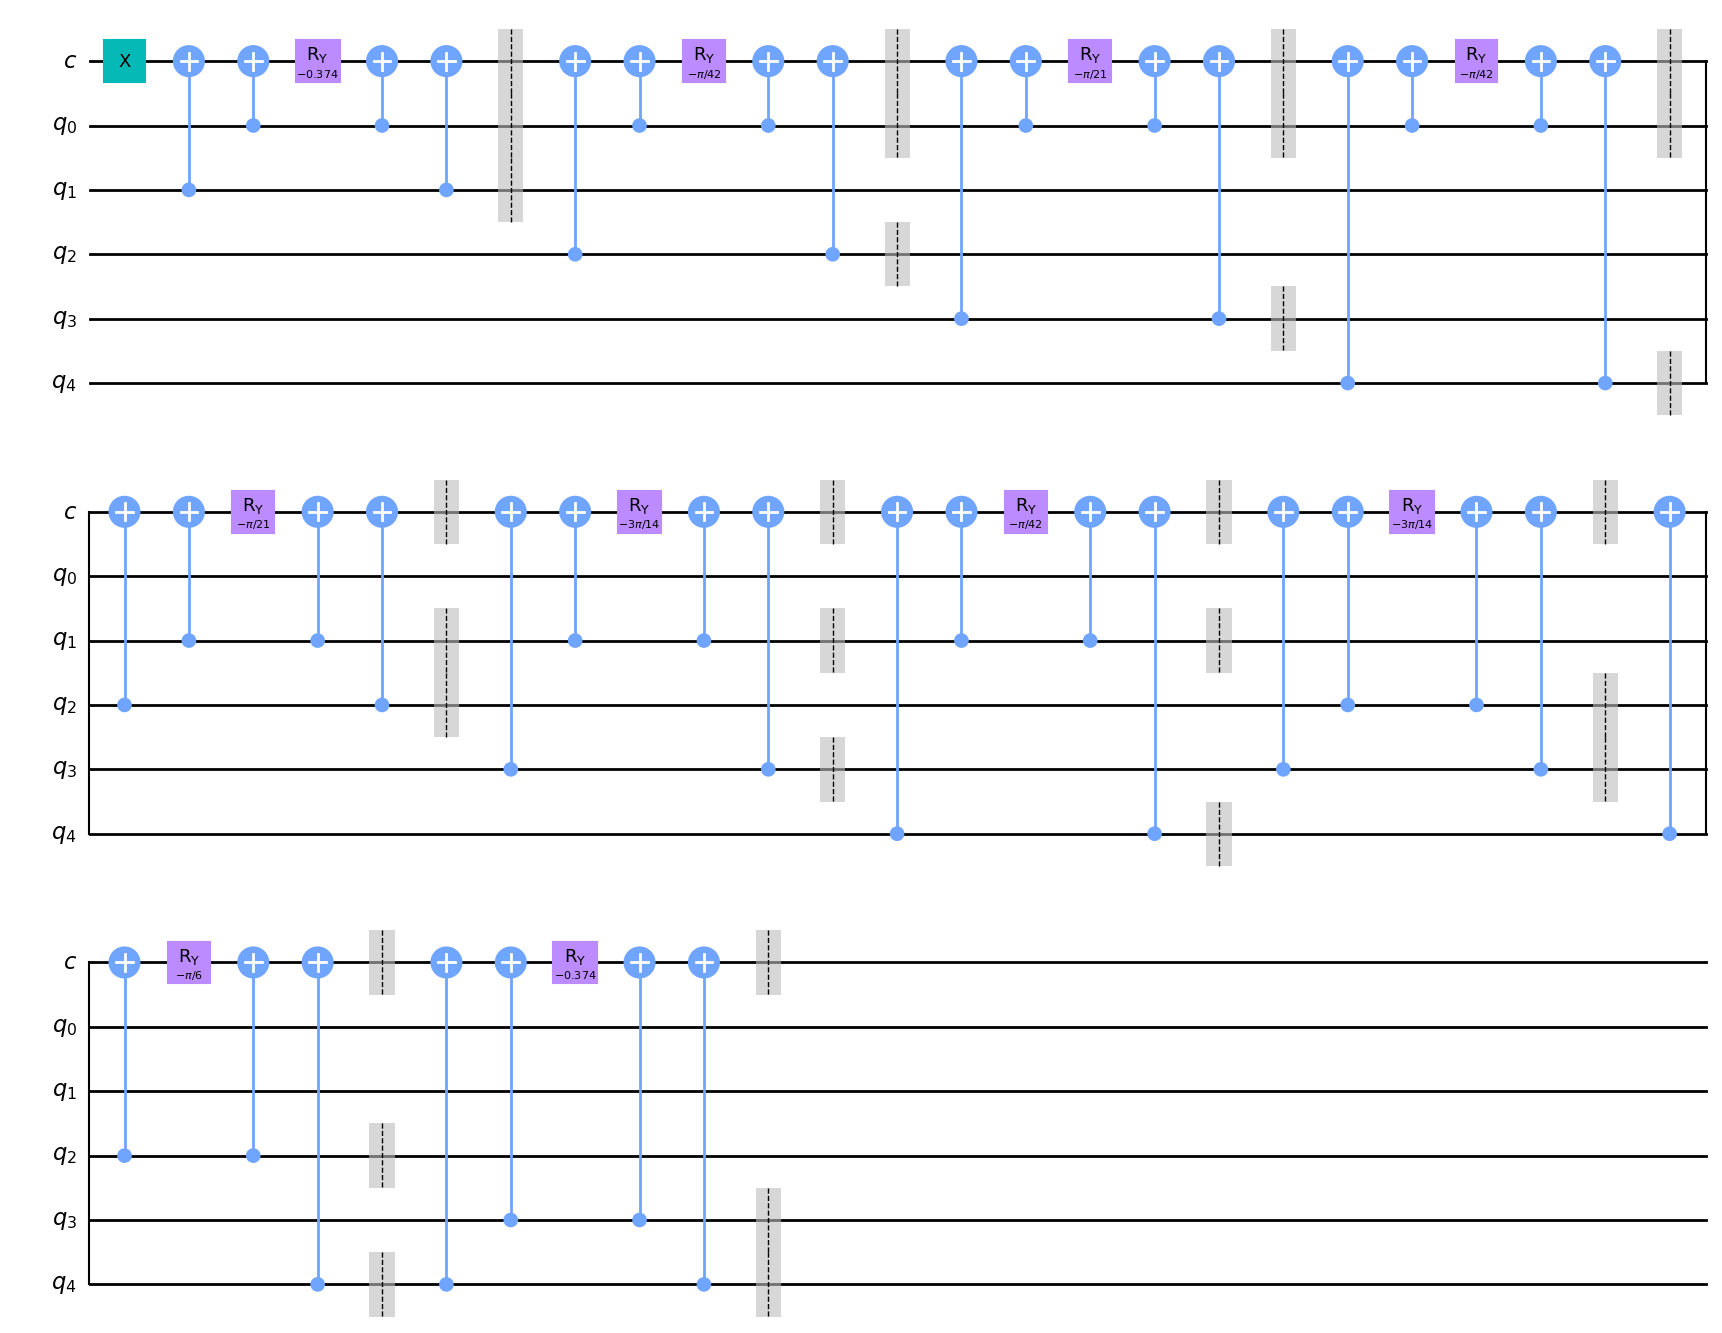

In [14]:
# Inspect the UQMaxCut circuit
mc._mc_circuit().draw(output='mpl')

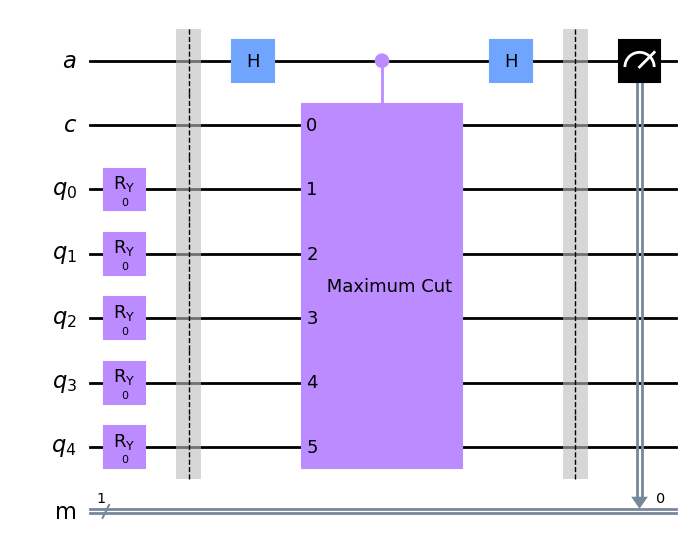

In [15]:
# Plot the complete circuit
mc.mc_circuit(mc.thetas_opt).draw(output='mpl')

## Optimize the Ansatzes parameters

In [16]:
gradient_method = {1: None,
                   2: 'parameter_shift',
                   3: 'finite_differences',
                   4: 'spsa'}    # Specify the optimization method
optimization_step = {1: 'vanilla',
                     2: 'adam'}  # Specify the step rule
mc.optimize(max_iter=20, alpha_const=1., backtracking=False, gradient_method=gradient_method[2], optimization_step=optimization_step[1], fine_tuning=False)

PARAMETER SHIFT OPTIMIZATION
Iter 0   , alpha = 2.8   , norm_grad = 1.0       , cost = -1.9322   
Iter 1   , alpha = 2.77  , norm_grad = 7.91      , cost = -3.76     
Iter 2   , alpha = 2.69  , norm_grad = 7.05      , cost = -6.3189   
Iter 3   , alpha = 2.56  , norm_grad = 13.86     , cost = -13.6824  
Iter 4   , alpha = 2.39  , norm_grad = 9.22      , cost = -8.7734   
Iter 5   , alpha = 2.18  , norm_grad = 11.61     , cost = -16.1368  
Iter 6   , alpha = 1.96  , norm_grad = 6.93      , cost = -10.3923  
Iter 7   , alpha = 1.72  , norm_grad = 11.46     , cost = -16.7635  
Iter 8   , alpha = 1.48  , norm_grad = 4.95      , cost = -14.5701  
Iter 9   , alpha = 1.25  , norm_grad = 9.68      , cost = -17.7557  
Iter 10  , alpha = 1.03  , norm_grad = 4.37      , cost = -17.1291  
Iter 11  , alpha = 0.84  , norm_grad = 6.11      , cost = -19.0091  
Iter 12  , alpha = 0.66  , norm_grad = 4.05      , cost = -18.5913  
Iter 13  , alpha = 0.52  , norm_grad = 4.72      , cost = -19.4791  
Iter 

## Get the results


MY RESULTS

Expected Cut =  [0, 3, 4] and [1, 2]
 or [1, 2] and [0, 3, 4]
       Obtained Cut: [0, 3, 4] and [1, 2]
Approximation Ratio: 0.999664306640625
Approximation Index: True
     Execution Time: 17.11211371421814 seconds


<Figure size 640x480 with 0 Axes>

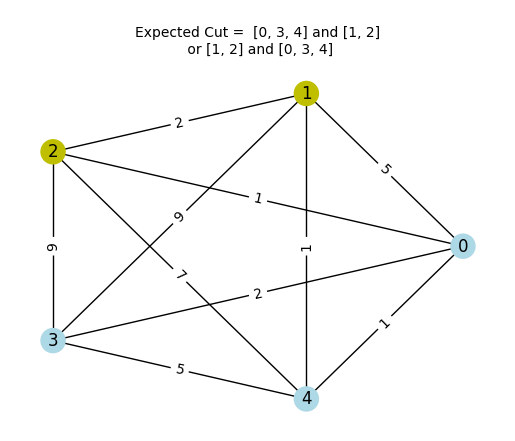

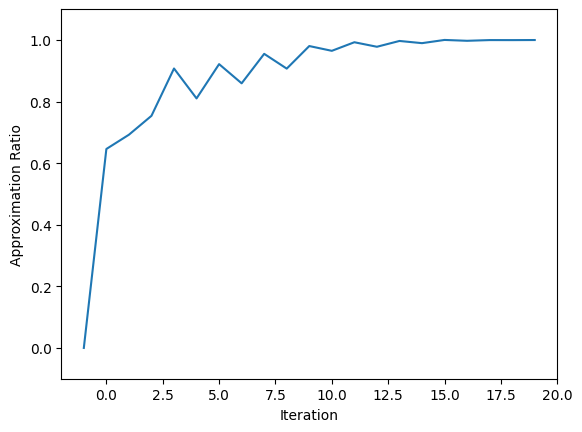

In [17]:
counts = mc.result()

## Plot Histogramm of counts results

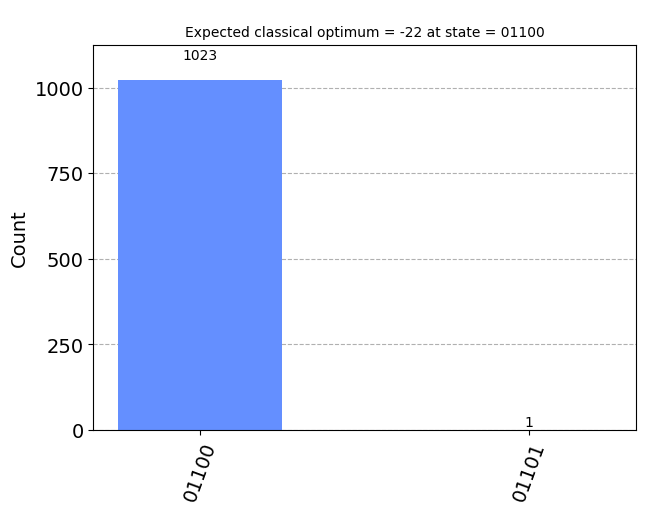

In [18]:
plot_histogram(counts,
               title=f'\nExpected classical optimum = {np.min(mc.costs)} '
                     f'at state = {np.binary_repr(np.argmin(mc.costs), width=mc.n)}')

# Citation
If you find this work useful, please cite the article [Article URL](#).
